Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

Answer:
Anomaly Detection is the process of identifying data points or patterns that deviate significantly from normal behavior in a dataset. These anomalies may indicate errors, fraud, faults, or rare but important events.

Types of Anomalies:

Point Anomalies:
A single data point that is significantly different from the rest of the data.
Example: A credit card transaction of ₹5,00,000 when typical transactions are below ₹10,000.

Contextual Anomalies:
A data point that is anomalous only within a specific context such as time or location.
Example: High electricity usage at midnight in a residential area.

Collective Anomalies:
A group of related data points that together form an anomaly, even if individual points are normal.
Example: A sudden sequence of failed login attempts indicating a cyberattack.

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases

Ans Isolation Forest, DBSCAN, and Local Outlier Factor are widely used anomaly detection techniques, but they differ significantly in their approach and applications. Isolation Forest detects anomalies by isolating data points using randomly generated decision trees, based on the idea that anomalies are easier to separate than normal points. It is highly efficient for large and high-dimensional datasets and is commonly used in fraud detection and network security. DBSCAN, on the other hand, is a density-based clustering algorithm that identifies anomalies as points lying in low-density regions. It is particularly effective for spatial data and datasets with clusters of arbitrary shapes, such as geographical or sensor data. Local Outlier Factor (LOF) detects anomalies by comparing the local density of a data point with that of its neighbors, making it suitable for datasets with varying densities. LOF is often used in scenarios like intrusion detection or medical data analysis where local deviations are more important than global ones.

Question 3: What are the key components of a Time Series? Explain each with one example.

Answer:

Trend: Long-term increase or decrease in data.
Example: Rising annual sales over years.

Seasonality: Repeating patterns at fixed intervals.
Example: Higher ice cream sales in summer.

Cyclical Component: Fluctuations without fixed period.
Example: Economic boom and recession cycles.

Residual (Noise): Random variation after removing trend and seasonality.
Example: Sudden unexpected demand spikes.

Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

Answer:
A time series is said to be stationary if its statistical properties such as mean, variance, and autocorrelation remain constant over time.

Testing Stationarity:

Augmented Dickey-Fuller (ADF) test

Transforming Non-Stationary Series:

Differencing

Log transformation

Seasonal differencing

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

Ans

**AR** : Uses past values

**MA**

Uses past errors

Noise smoothing

**ARIMA**: AR + MA + differencing	, Non-stationary series

**SARIMA**: 	ARIMA + seasonality	, Seasonal data

**SARIMAX**: 	SARIMA + exogenous variables,	External factors included

Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.

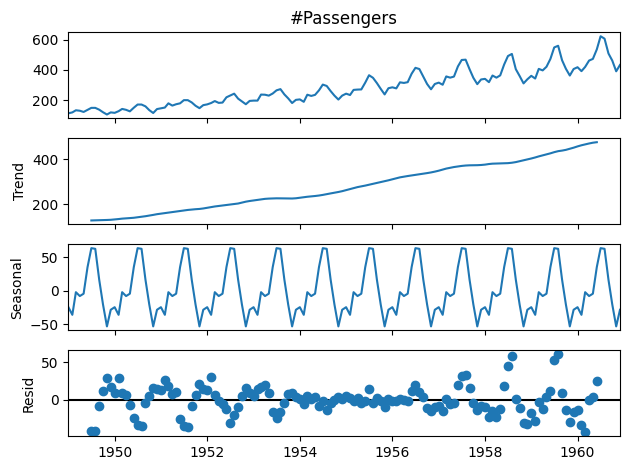

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

decomposition = seasonal_decompose(data['#Passengers'], model='additive')
decomposition.plot()
plt.show()


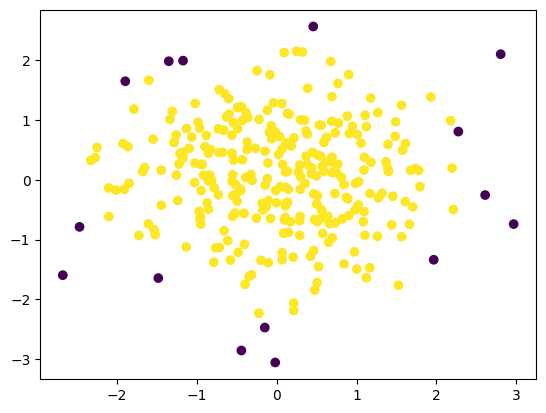

In [2]:
# Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
#detect anomalies. Visualize the anomalies on a 2D scatter plot.

from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np

X = np.random.randn(300, 2)
model = IsolationForest(contamination=0.05)
labels = model.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


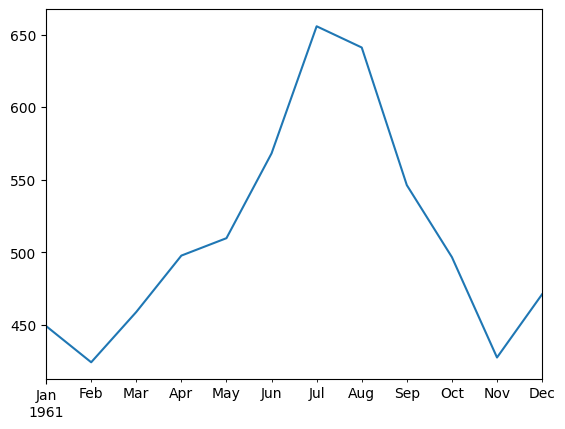

In [4]:

#Question 8: Train a SARIMA model on the monthly airline passengers dataset.
# Forecast the next 12 months and visualize the results.
# (Include your Python code and output in the code box below.)

from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

model = SARIMAX(data['#Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

forecast = results.forecast(12)
forecast.plot()
plt.show()


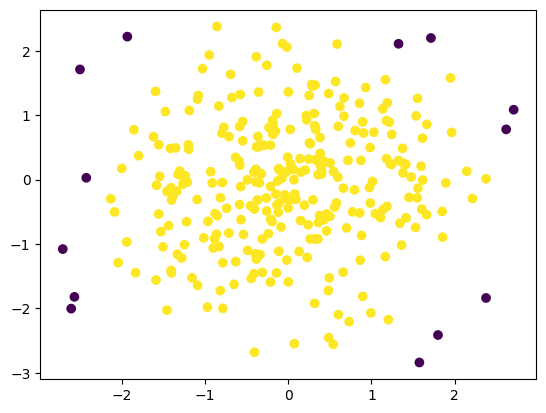

In [5]:
# Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
# anomalies and visualize them using matplotlib.

from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import numpy as np

X = np.random.randn(300, 2)
lof = LocalOutlierFactor(n_neighbors=20)
labels = lof.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()



**Question 10: Real-time power grid monitoring – Explain workflow.**

Answer:
In a real-time power grid monitoring system, the primary objective is to forecast short-term energy demand and detect abnormal spikes or drops in electricity consumption. The workflow begins with real-time data ingestion, where streaming data collected every 15 minutes (timestamp, region, weather conditions, and energy usage) is continuously stored and preprocessed. This includes handling missing values, smoothing noise, and scaling numerical features.

For anomaly detection, algorithms such as Isolation Forest, Local Outlier Factor (LOF), or DBSCAN can be used. Isolation Forest is suitable for real-time systems due to its fast execution and ability to handle high-dimensional data, while LOF is useful for detecting local anomalies in regions with varying consumption patterns. DBSCAN can help identify abnormal consumption clusters and noise in spatial or regional data.

For short-term energy demand forecasting, SARIMAX is the most appropriate model because it can capture seasonality (daily/weekly patterns) and also incorporate exogenous variables such as temperature, humidity, and weather conditions. The model is trained on historical data and updated periodically using a rolling window approach.

To validate and monitor performance, forecasting accuracy is evaluated using metrics such as RMSE or MAE, while anomaly detection performance is monitored using alert thresholds, anomaly counts, and domain expert feedback. Continuous model retraining ensures adaptability to changing consumption behavior.

This solution helps businesses by enabling early detection of faults or abnormal demand, preventing blackouts, optimizing load distribution, reducing operational costs, and supporting informed decision-making for grid stability and energy planning.